# 파일 읽어오기

train, test파일 존재 여부 확인 후 zip파일 다운로드

In [1]:
import os.path

url = "https://bit.ly/3gLj0Q6"    #파일 다운로드 링크
download_file_name = url.split("/")[-1] + ".zip"

#데이터 파일 존재 여부
if not os.path.exists("./train.csv") and not os.path.exists("./test.csv"):
    try:
        import wget
    except:
        !pip install wget
        print("install wget")
        import wget    
    print("import wget")    
    
    if not os.path.exists("./" + download_file_name + ".zip"):
        wget.download(url, download_file_name + ".zip")
        print("\nfile download")
        
    import zipfile
    with zipfile.ZipFile(download_file_name + ".zip", "r") as existing_zip: #해당 파일(여기는 zip 내용물 전부 읽는다)
        existing_zip.extractall("./")  #해당 위치에 압축 해제
    
if os.path.exists("./" + download_file_name + ".zip"):
    os.remove("./" + download_file_name + ".zip")

판다스 import

In [2]:
import pandas as pd

학습 csv파일 읽어오기

In [3]:
train = pd.read_csv("./train.csv")
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


테스트 데이터 읽어오기

In [4]:
test = pd.read_csv("./test.csv")
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


# 전처리 과정(결측치(NaN) 대체)
#### 전처리는 아래의 방법중 하나를 택해서 진행해야함

### 1. NaN값 포함 row 제거
#### dropna(null)

In [28]:
train = train.dropna()
test = test.dropna()
#model 학습 이후 결과값을 submmision과 row length 불일치로 에러가 발생할 수 있으니 참고

### 2. NaN 데이터 값 변경
#### fillna(num)


In [10]:
train = test.fillna(0)
test = test.fillna(0)

### 3. 평균값으로 채우기
#### fillna({column_name:dataType(df[column_name].mean())}, inplace = True)

In [5]:
train_column_name = list(train)
for name in train_column_name[2:-1]:
    train.fillna({name:int(train[name].mean())}, inplace=True)

In [6]:
test_column_name = list(test)
for name in test_column_name[2:]:
    test.fillna({name:int(test[name].mean())}, inplace=True)

### 4. 보간법
#### NaN의 이전 row와 다음 row값의 평균으로 대체 mean(df[n-1], df[n+1])
#### df.interpolate(inplace=True)

In [5]:
train = train.interpolate(implace = True)
train.isnull().sum()
train.shape

(1459, 11)

In [6]:
test = test.interpolate(implace = True)
test.isnull().sum()
test.shape

(715, 10)

# 모델링

## 2. 모델개념(DesisionTree)
=:스무고개 방식의 구조화("한쪽 방향으로 쏠리도록" 이 목적)
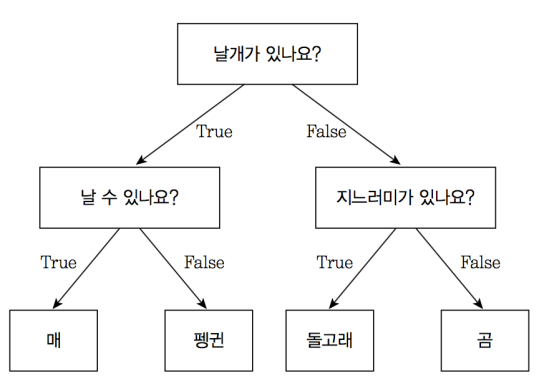

## 1. scikit-learn(lib)
참조 https://scikit-learn.org/stable/

In [46]:
import sklearn

의사결정분류

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

의사결정회귀

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

평가척도에 맞게 학습(deafult는 mse로 될것이다)<br>
$$ MSE = \frac{1}{N} \sum_{i=1}^N ({y_i - \hat{y}_i})^2 $$ <br>
$$ RMSE = \sqrt{MSE} $$<br>


In [10]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(criterion = "mse")

## 3 모델 훈련
X 데이터는 trian data에서 drop(["제외할 칼럼명"], axis=1)를 이용해 예측할 feature를 제외할 수 있습니다
Y 데이터는 trian["예측 칼럼명"] 으로 인덱싱할 수 있습니다.

X_train은 input Y_train은 output으로 사용

In [8]:
X_train = train.drop(["count"], axis = 1)
Y_train = train["count"]

In [11]:
model.fit(X_train, Y_train)

RandomForestRegressor()

## 4 예측하기
훈련된 모델에서 predict()에 예측하고자 하는 data를 인자로 넣어주게 되면 해당 결과를 array에 할당 가능

In [12]:
pred = model.predict(test)

## 5 예측한 결과 내보내기

파일 불러오기

In [7]:
submission = pd.read_csv("./submission.csv")

submission 파일의 count 피쳐에 예측결과 할당하기

In [8]:
submission['count'] = pred

In [9]:
submission.to_csv('sub.csv', index=False)